# Exploratory Analysis of Phone Prices

In [80]:
# to handle the data
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [26]:
# execute the following statement after downloading the kaggle.json file as per the instructions at https://saturncloud.io/blog/how-to-import-kaggle-datasets-into-jupyter-notebook/
!mv /tmp/kaggle.json $HOME/.kaggle/

mv: cannot stat '/tmp/kaggle.json': No such file or directory


In [27]:
import kaggle
# ignore the warnings if any, if you are running it on the personal computer

In [28]:
DATA_DIR = './data/'

In [29]:
dataset_name = 'berkayeserr/phone-prices'
kaggle.api.dataset_download_files(dataset_name, path=DATA_DIR, unzip=True)

In [31]:
df = pd.read_csv(DATA_DIR+'cleaned_all_phones.csv')
df.head

<bound method NDFrame.head of             phone_name   brand           os  inches resolution  battery  \
0         Y6II Compact  Huawei  Android 5.1    5.00   720x1280     2200   
1             K20 plus      LG  Android 7.0    5.30   720x1280     2700   
2       P8 Lite (2017)  Huawei  Android 7.0    5.20  1080x1920     3000   
3         Redmi Note 4  Xiaomi  Android 6.0    5.50  1080x1920     4100   
4                  P10  Huawei  Android 7.0    5.10  1080x1920     3200   
...                ...     ...          ...     ...        ...      ...   
1507         vivo Y77t    Vivo   Android 13    6.64  1080x2388     5000   
1508               11x  Realme   Android 13    6.72  1080x2400     5000   
1509               GT5  Realme   Android 13    6.74  1240x2772     5240   
1510          GT5 240W  Realme   Android 13    6.74  1240x2772     4600   
1511  vivo iQOO Z7 Pro    Vivo   Android 13    6.78  1080x2400     4600   

     battery_type  ram(GB) announcement_date  weight(g)  ...  video_1

In [48]:
print(f"Varibales in the Phone Prices dataframe: {list(df.columns)}")
print(f"Number of columns: {df.shape[1]}")

Varibales in the Phone Prices dataframe: ['phone_name', 'brand', 'os', 'inches', 'resolution', 'battery', 'battery_type', 'ram(GB)', 'announcement_date', 'weight(g)', 'storage(GB)', 'video_720p', 'video_1080p', 'video_4K', 'video_8K', 'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps', 'video_480fps', 'video_960fps', 'price(USD)']
Number of columns: 22


In [63]:
df['announcement_date'] = pd.to_datetime(df['announcement_date']) # transform the announcement_date as datetime instead of categorical

## identify the datatypes of the variables

In [71]:
cat_vars = [var for var in df.columns if df[var].dtype == 'O'] # identify the categorical variables
bool_vars = [var for var in df.columns if df[var].dtype == 'bool'] # identify the boolean variables
temp_vars = [var for var in df.columns if df[var].dtype == 'datetime64[ns]'] # identify the temporal variables
num_vars = [var for var in df.columns if var not in cat_vars+bool_vars+temp_vars] # identify the temporal variables
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>0]
print(f"{cat_vars=}; {len(cat_vars)=}")
print(f"{bool_vars=}; {len(bool_vars)=}")
print(f"{temp_vars=}; {len(temp_vars)=}")
print(f"{num_vars=}; {len(num_vars)=}")
print(f"{vars_with_na=}; {len(vars_with_na)=}") #confirm that there is no missing data

cat_vars=['phone_name', 'brand', 'os', 'resolution', 'battery_type']; len(cat_vars)=5
bool_vars=['video_720p', 'video_1080p', 'video_4K', 'video_8K', 'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps', 'video_480fps', 'video_960fps']; len(bool_vars)=10
temp_vars=['announcement_date']; len(temp_vars)=1
num_vars=['inches', 'battery', 'ram(GB)', 'weight(g)', 'storage(GB)', 'price(USD)']; len(num_vars)=6
vars_with_na=[]; len(vars_with_na)=0


## Summary Statistics

### Categorical variable

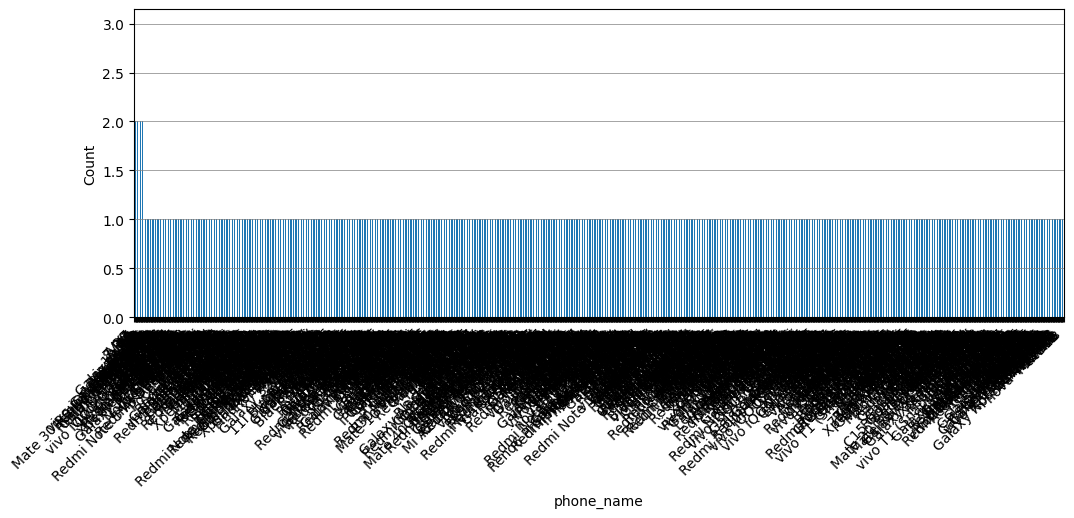

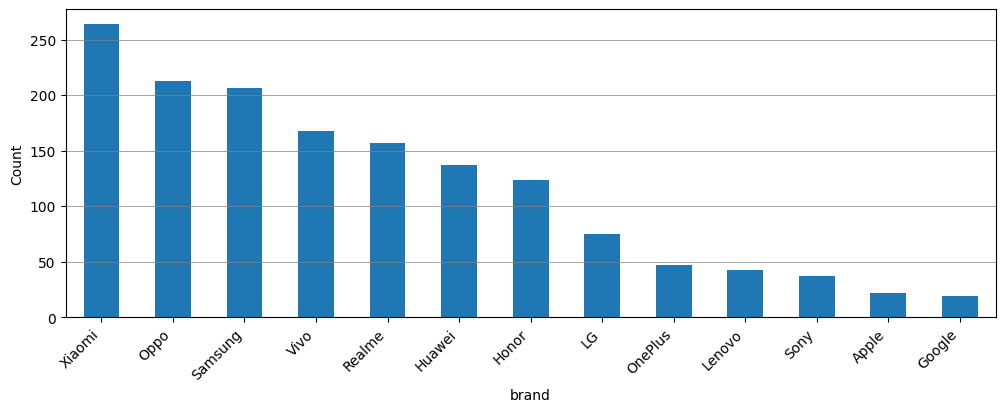

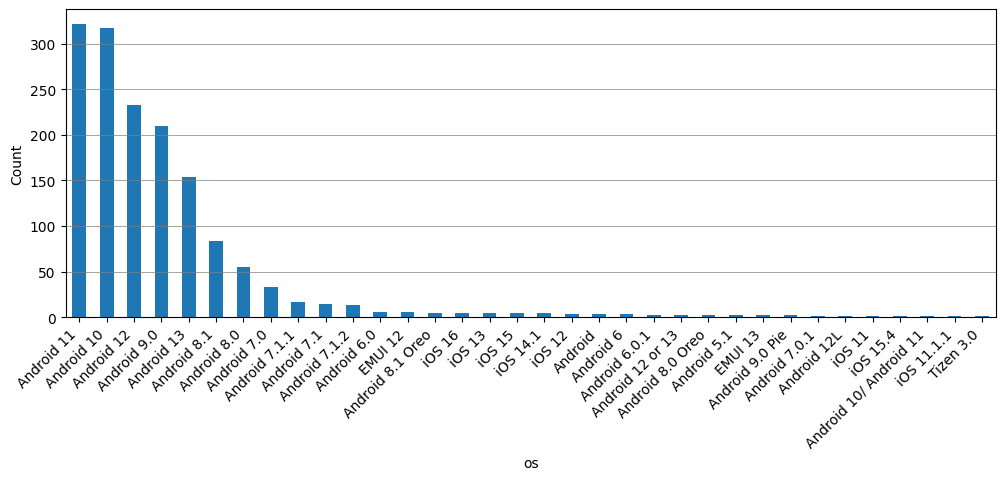

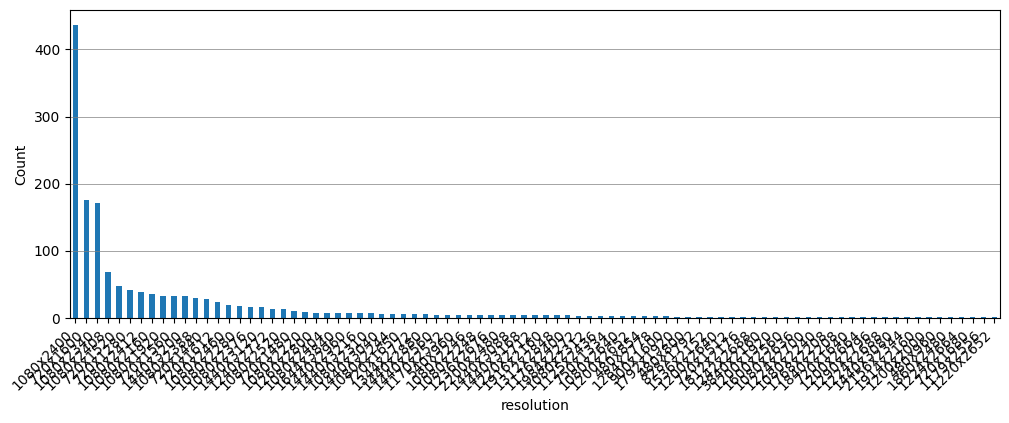

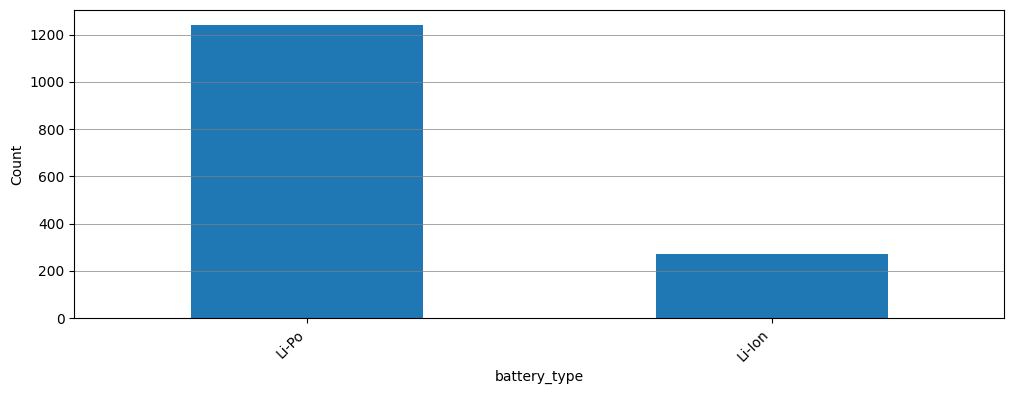

In [99]:
def print_cat_vars(df, var):
    df = df.copy()
    # plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
    # tmp = df[var].value_counts().sort_values(ascending=False).hist(bins=df[var].nunique)
    tmp = df[var].value_counts().sort_values(ascending=False).plot.bar(figsize=(12, 4))
    # tmp.set_xticklabels(tmp.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.grid(which='major', axis='y', linestyle='-', linewidth='0.5', color='gray')  # Turn off vertical grid lines
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()
    

for var in cat_vars:
    print_cat_vars(df, var)

### Initial Observations: Categorical Variables

1. The majority of the  phones names occurred only once in the dataset, and a few appeared twice.
2. **Xiaomi** brand phones are dominant, followed by **Oppo, Samsung** and **Vivo**, while **Apple** and **Google** brand phones are least in number.
3. Recent Android OS versions (**11, 10, 12** in the non-increasing order) are popular across the phones.
4. The predominant screen resolution across the phones is **1080x2400** which is more than the double of the next dominant screen resolution (**720x1600**).
5. There are only two battery types: **Li-Po** (Lithium-Polymer) and **Li-Ion** (Lithium-on). The former (Li-Po) battery is present in more than 80% of the phones.